<a href="https://colab.research.google.com/github/Yamito548/Act-3.3/blob/main/(Resubido)Actividad_3_3_%E2%80%93_IRIS_con_NaiveBayes_y_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicicio 3.3** by Dylan J. Ramírez Bermúdez
Dataset pingüinos (Revisado)

# Cross validation

In [1]:
#Datasets
import seaborn as sns
#maninuplacion de datos
import pandas as pd
import numpy as np
#Gráficos
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
#Clasificadores
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
import matplotlib.pyplot as plt
#Dataset pingüinos
penguin = sns.load_dataset("penguins")
penguinCopy = sns.load_dataset("penguins")
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [2]:
#Rellenamos los datos faltantes.
penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = \
    penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin.mean())

<ipython-input-2-43fa0ba2d099>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].fillna(penguin.mean())


# Cambiar valores a 1

In [3]:
le = LabelEncoder()
penguin['sex'] = le.fit_transform(penguin['sex'])

In [4]:
penguin['sex'] = penguin['sex'].fillna(penguin['sex'].mode().iloc[0])

# Cross validation a mano

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    print("Metrics \n"
      +classification_report(y_true, y_pred))

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [6]:
#Dividamos los datos de entrenamiento
le = LabelEncoder()
penguin['species'] = le.fit_transform(penguin['species'])
caract_seleccionadas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguin[caract_seleccionadas]
y = penguin['species']
y_copy = penguinCopy['species']

le = LabelEncoder()
penguin['species'] = le.fit_transform(penguin['species'])

le = LabelEncoder()
penguin['island'] = le.fit_transform(penguin['island'])


X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42, stratify=y)
y

0      0
1      0
2      0
3      0
4      0
      ..
339    2
340    2
341    2
342    2
343    2
Name: species, Length: 344, dtype: int64

In [7]:
import numpy as np
y_train_array = y_train.to_numpy()
y_train_array
np.bincount(y_train_array)

array([91, 41, 74])

In [8]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB

# classifiers
names = ["GaussianNB", "MultiNomialNB", 'BernouilliNB', 'ComplementNB']
classifiers = [GaussianNB(), MultinomialNB(), BernoulliNB(), ComplementNB()]

for name, clf in zip(names, classifiers):

  # Entrenamos el modelo
  clf.fit(X_train, y_train)
  # predecimos
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

Modelo: GaussianNB =   0.94
Modelo: MultiNomialNB =   0.86
Modelo: BernouilliNB =   0.44
Modelo: ComplementNB =   0.71


Metrics 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        61
           1       0.85      0.85      0.85        27
           2       1.00      0.98      0.99        50

    accuracy                           0.94       138
   macro avg       0.93      0.93      0.93       138
weighted avg       0.94      0.94      0.94       138

Confusion matrix, without normalization
[[58  3  0]
 [ 4 23  0]
 [ 0  1 49]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

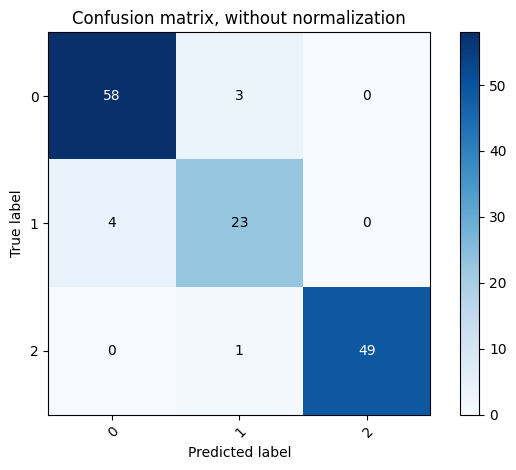

In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

In [10]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[1.56796609e-15, 2.88715384e-11, 1.00000000e+00],
       [9.99741031e-01, 2.58968729e-04, 4.56851645e-16],
       [1.13372699e-03, 9.98840053e-01, 2.62196539e-05],
       [4.26851347e-15, 6.92448018e-09, 9.99999993e-01],
       [9.70377158e-01, 2.96228409e-02, 1.13823990e-09],
       [5.18613325e-01, 4.81386675e-01, 8.65627331e-12],
       [5.02335433e-10, 5.20855986e-06, 9.99994791e-01],
       [4.60693232e-12, 2.51244677e-09, 9.99999997e-01],
       [9.78340653e-01, 2.16593475e-02, 1.05942480e-12],
       [9.96529657e-01, 3.47034323e-03, 1.33887913e-15],
       [2.80906462e-16, 7.99286436e-09, 9.99999992e-01],
       [8.33120754e-01, 1.66879232e-01, 1.38573246e-08],
       [9.99968417e-01, 3.15833420e-05, 2.17056901e-12],
       [8.17376041e-01, 1.82623958e-01, 1.13401989e-09],
       [1.39018096e-08, 1.53566783e-06, 9.99998450e-01],
       [1.99160107e-09, 1.13906651e-06, 9.99998859e-01],
       [9.92643669e-01, 7.35632403e-03, 7.38494454e-09],
       [2.24635853e-01, 7.75359

In [11]:
# Utilizando cross validation
from sklearn.model_selection import KFold
cv = KFold(n_splits = 5, shuffle = True)
total_scores = []
for name, clf in zip(names, classifiers):
  fold_accuracy = []
  for train_fold, test_fold in cv.split(X_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold]
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento y ejeución del modelo
    clf.fit(f_train_x, f_train_y)
    # Realizamos la predicción (Final evaluation) y guardamos la precisión para calcular la media posteriormente
    y_pred = clf.predict(X_train.iloc[test_fold])
    # evaluación del modelo
    acc = accuracy_score(y_train.iloc[test_fold], y_pred)
    fold_accuracy.append(acc)
  total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))


Modelo: GaussianNB =   0.96
Modelo: MultiNomialNB =   0.80
Modelo: BernouilliNB =   0.44
Modelo: ComplementNB =   0.69


In [12]:
#Vemos los datos con cross validation
print("Sin cross validation:\n")
for name, clf in zip(names, classifiers):

  # FIT THE MODEL
  clf.fit(X_train, y_train)
  # PREDIT AND SCORE
  score = clf.score(X_test, y_test) #Returns the mean accuracy on the given test data and labels.
  print ("Modelo: %s = %6.2f" % (name, score))

print("Con cross validation:")

for i in range(len(names)):
  print ("Modelo: %s = %6.2f" % (names[i], total_scores[i]))

Sin cross validation:

Modelo: GaussianNB =   0.94
Modelo: MultiNomialNB =   0.86
Modelo: BernouilliNB =   0.44
Modelo: ComplementNB =   0.71
Con cross validation:
Modelo: GaussianNB =   0.96
Modelo: MultiNomialNB =   0.80
Modelo: BernouilliNB =   0.44
Modelo: ComplementNB =   0.69


En este caso se puede ver que por lo menos para el modelo GaussianNB, si que hay una pequeña mejora, bastante poca pero igual el modelo funciona bastante bien.

Metrics 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        61
           1       0.85      0.81      0.83        27
           2       1.00      0.98      0.99        50

    accuracy                           0.93       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.93      0.93      0.93       138

Confusion matrix, without normalization
[[58  3  0]
 [ 5 22  0]
 [ 0  1 49]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

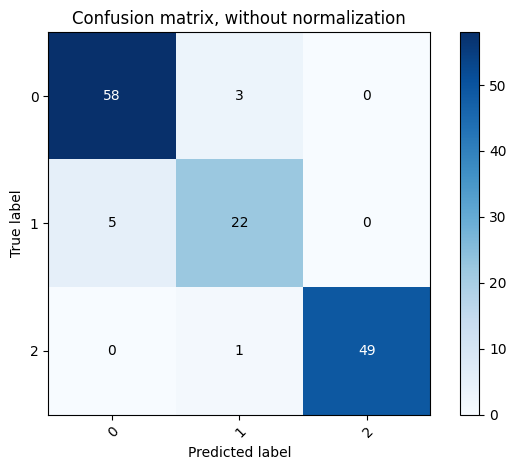

In [13]:
#Otra vez el mejor es GausianNB
clf = GaussianNB()
#clf = MultinomialNB()
for train_fold, test_fold in cv.split(X_train):
    # División train test aleatoria
    f_train_x = X_train.iloc[train_fold] # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_y = y_train.iloc[train_fold]
    # entrenamiento
    clf.fit(f_train_x, f_train_y)

y_pred = clf.predict(X_test)
# Comparamos lo predicho con lo esperado para los datos de test
acc_GaussianNB = accuracy_score(y_test, y_pred)

plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

# Exportar a un fichero el modelo entrenado

In [14]:
#Instalamos la librería joblib
!pip install joblib

In [15]:
# Exportar modelo a fichero
import sklearn.externals
import joblib
joblib.dump(clf,'pinguinos_model_dylan.pkl')

['pinguinos_model_dylan.pkl']

In [16]:
#Importar el modelo entrenado y ejecutar de nuevo test
clf_entrenado = GaussianNB().fit(X_train,y_train)
clf_entrenado = joblib.load('pinguinos_model_dylan.pkl')
clf_entrenado.score(X_test, y_test) # Obtenemos la precisión

0.9347826086956522

Metrics 
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        61
           1       0.85      0.81      0.83        27
           2       1.00      0.98      0.99        50

    accuracy                           0.93       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.93      0.93      0.93       138

Confusion matrix, without normalization
[[58  3  0]
 [ 5 22  0]
 [ 0  1 49]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

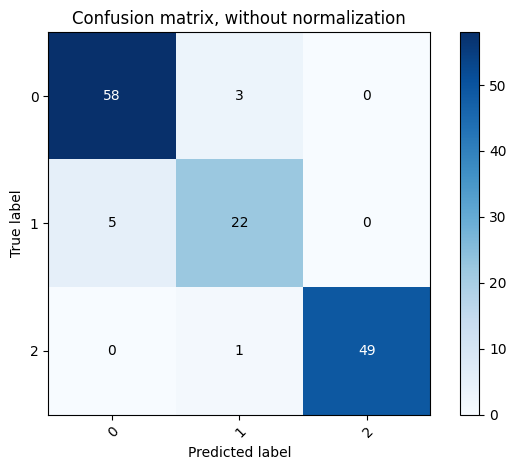

In [17]:
#Obtenenmos la matriz de confusión para ver que coincide con la anterior.
y_pred = clf_entrenado.predict(X_test)
plot_confusion_matrix(y_test, y_pred , classes = unique_labels(y_test, y_pred), normalize=False)

In [18]:
#Probamos introducciendo nuevos valores.
X_prueba = np.asanyarray([39.10000,18.70000,181000000,3750.000000]).reshape(1,-1)
predict = clf_entrenado.predict(X_prueba)
predict[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


1

In [19]:
categorias_unicas = penguinCopy['species'].unique()
print(categorias_unicas)

['Adelie' 'Chinstrap' 'Gentoo']
